In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
loc = r'C:\Users\hakam\ME555Project\Dataset\ANHINGA\004.jpg'
im = Image.open(loc)  
image_gr = im.convert("L")    
print("\n Original type: %r \n\n" % image_gr)

# convert image to a matrix with values from 0 to 255 (uint8) 
arr = np.asarray(image_gr) 
print("After conversion to numerical representation: \n\n %r" % arr) 


 Original type: <PIL.Image.Image image mode=L size=224x224 at 0x1AE324F3108> 


After conversion to numerical representation: 

 array([[101,  97,  93, ...,  75,  74,  74],
       [105, 101,  97, ...,  75,  74,  74],
       [109, 105, 100, ...,  75,  74,  74],
       ...,
       [140, 137, 156, ..., 165, 165,  37],
       [123, 116, 158, ..., 175, 143,  45],
       [ 90,  59, 140, ..., 187, 115,  66]], dtype=uint8)


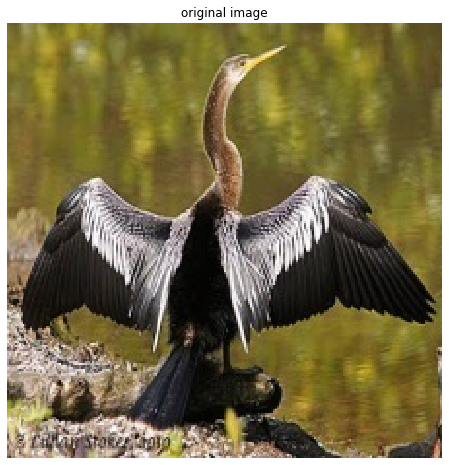

In [3]:
img = pd.read_csv(loc)
plt.imshow(img)
plt.title('original image');
plt.axis('off');


 Input image converted to gray scale: 



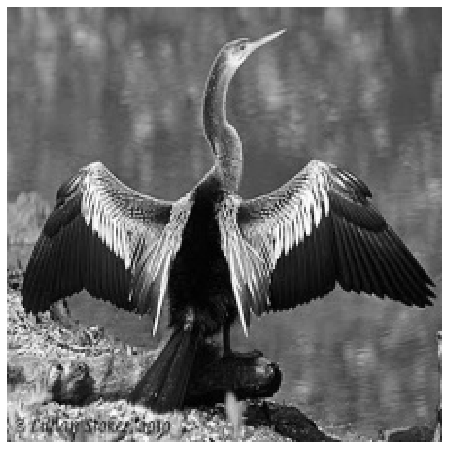

In [4]:
plt.figure(1,figsize=(12,8))
imgplot = plt.imshow(arr)
imgplot.set_cmap('gray')  #you can experiment different colormaps (Greys,winter,autumn)
print("\n Input image converted to gray scale: \n")
plt.axis('off')
plt.show(imgplot)

In [5]:
kernel = np.array([[ 0, 1, 0],
                   [ 1,-4, 1],
                   [ 0, 1, 0],]) 

grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')

GRADIENT MAGNITUDE - Feature map


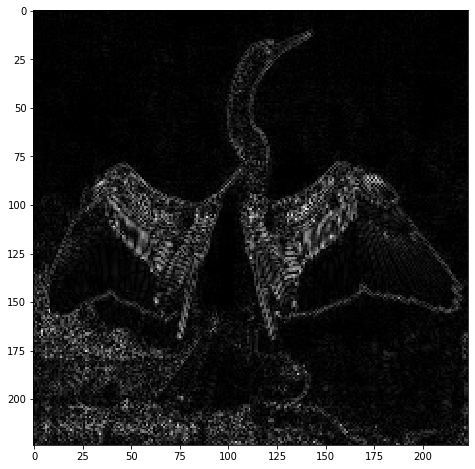

In [6]:
print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 8))
aux.imshow(np.absolute(grad), cmap='gray');

In [7]:
type(grad)

grad_biases = np.absolute(grad) + 100

grad_biases[grad_biases > 255] = 255

In [8]:
from fastai.vision import *
import numpy as np # linear algebra
import pandas as pd

In [9]:
path = Path(r'C:\Users\hakam\ME555Project\Dataset')

In [10]:
tfms = get_transforms(do_flip=True,max_lighting=0.1,max_rotate=0.1)

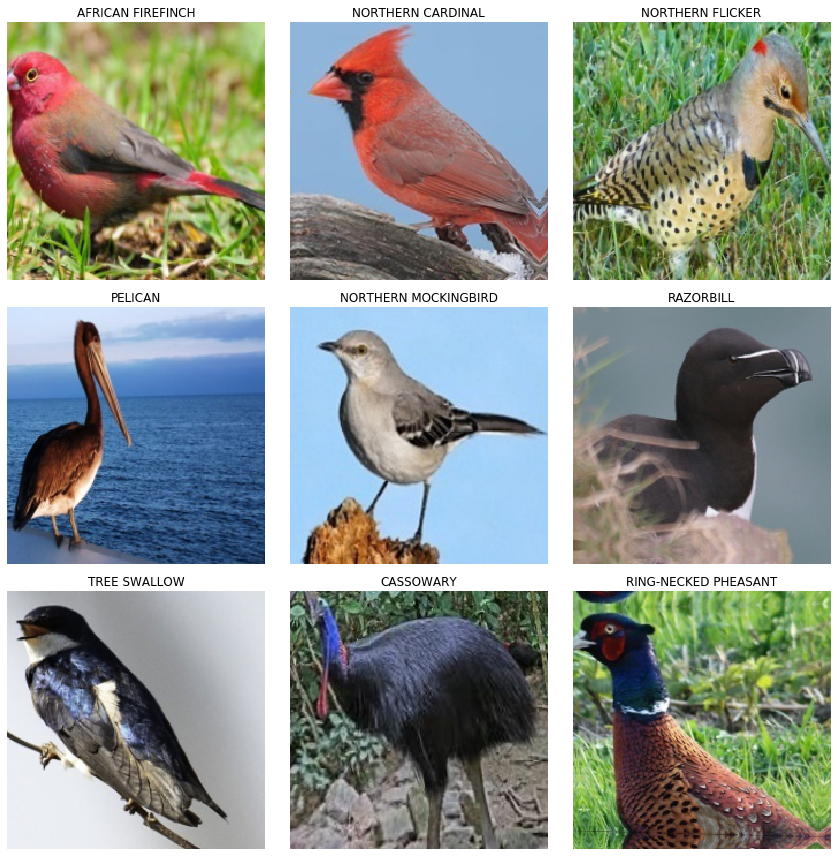

In [11]:
data = (ImageDataBunch.from_folder(path,train='.',valid_pct=0.15,ds_tfms=tfms,size=224, num_workers=4)
                     .normalize(imagenet_stats))   

data.show_batch(rows=3)

In [12]:
len(data.classes), len(data.train_ds), len(data.valid_ds)

(200, 25078, 4425)

In [13]:
fb = FBeta()
fb.average = 'macro'

In [14]:
learn = cnn_learner(data, models.resnet18, metrics=[error_rate,fb],model_dir='/kaggle/working/')

epoch,train_loss,valid_loss,error_rate,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


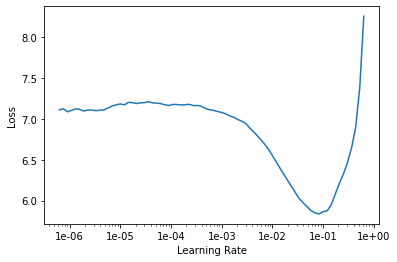

In [15]:
learn.lr_find()
learn.recorder.plot()

In [16]:
lr = 1e-2

learn.fit_one_cycle(5,lr,moms=(0.8,0.7))

epoch,train_loss,valid_loss,error_rate,f_beta,time
0,1.372541,1.306992,0.312090,0.673422,02:30
1,1.073540,0.704409,0.188927,0.800709,02:32
2,0.673535,0.412265,0.112090,0.883829,02:29
3,0.434663,0.261351,0.073672,0.926534,02:29
4,0.312143,0.230722,0.064181,0.936186,02:29


In [17]:
interp = ClassificationInterpretation.from_learner(learn)

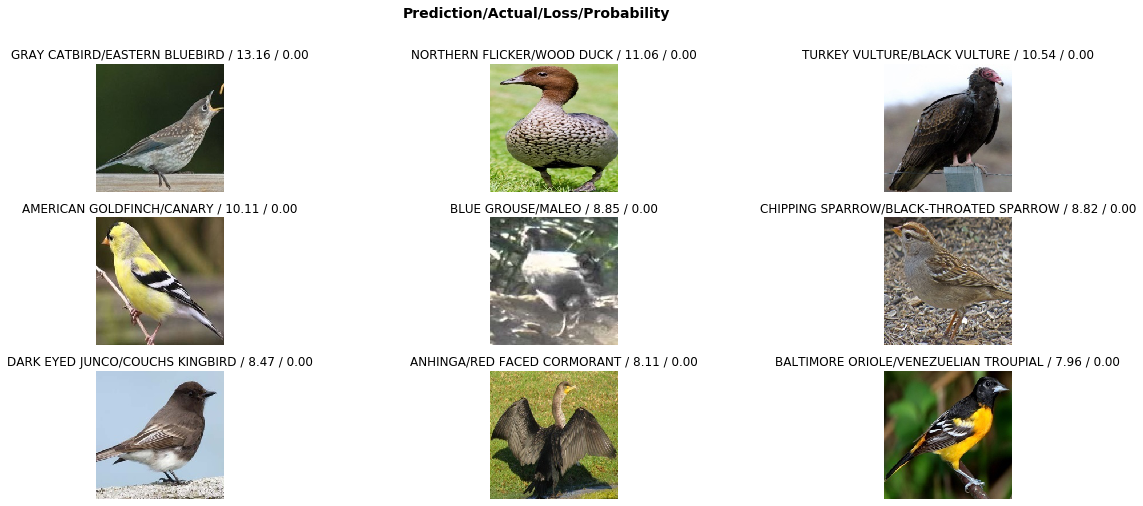

In [18]:
interp.plot_top_losses(9,figsize=(20,8))

In [19]:
interp.most_confused(min_val=3)

[('GILDED FLICKER', 'NORTHERN FLICKER', 7),
 ('RUBY THROATED HUMMINGBIRD', 'ANNAS HUMMINGBIRD', 5),
 ('SAND MARTIN', 'COMMON HOUSE MARTIN', 4),
 ('AMERICAN KESTREL', 'PEREGRINE FALCON', 3),
 ('CALIFORNIA GULL', 'RING-BILLED GULL', 3),
 ('COMMON HOUSE MARTIN', 'TREE SWALLOW', 3),
 ('EASTERN BLUEBIRD', 'INDIGO BUNTING', 3),
 ('HOUSE FINCH', 'PURPLE FINCH', 3),
 ('NORTHERN GANNET', 'WHITE TAILED TROPIC', 3),
 ('OCELLATED TURKEY', 'WILD TURKEY', 3),
 ('RING-BILLED GULL', 'CALIFORNIA GULL', 3)]

CACTUS WREN


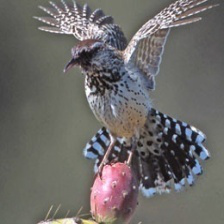

In [20]:
file = r'C:\Users\hakam\ME555Project\Dataset\CACTUS WREN\097.jpg'
img = open_image(file) 
print(learn.predict(img)[0]) 
img

BLACK-CAPPED CHICKADEE


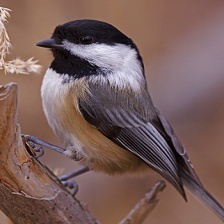

In [21]:
file = r'C:\Users\hakam\ME555Project\Dataset\BLACK-CAPPED CHICKADEE\005.jpg'
img = open_image(file)  
print(learn.predict(img)[0]) 
img

CAPUCHINBIRD


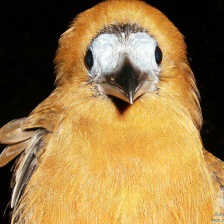

In [22]:
file = r'C:\Users\hakam\ME555Project\Dataset\CAPUCHINBIRD\003.jpg'
img = open_image(file) 
print(learn.predict(img)[0])
img

ANNAS HUMMINGBIRD


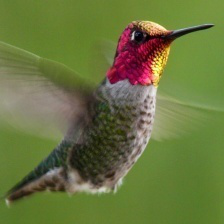

In [23]:
file = r'C:\Users\hakam\ME555Project\Dataset\ANNAS HUMMINGBIRD\115.jpg'
img = open_image(file) 
print(learn.predict(img)[0]) 
img

GILDED FLICKER


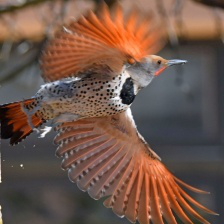

In [24]:
file = r'C:\Users\hakam\ME555Project\Dataset\GILDED FLICKER\075.jpg'
img = open_image(file) 
print(learn.predict(img)[0]) 
img

BEARDED BARBET


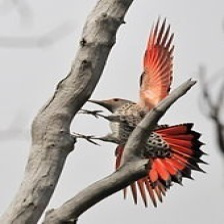

In [25]:
file = r'C:\Users\hakam\ME555Project\Dataset\NORTHERN FLICKER\013.jpg'
img = open_image(file) 
print(learn.predict(img)[0])
img

NORTHERN FLICKER


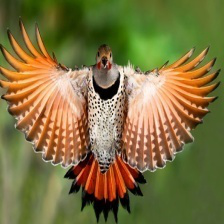

In [26]:
file = r'C:\Users\hakam\ME555Project\Dataset\NORTHERN FLICKER\102.jpg'
img = open_image(file) 
print(learn.predict(img)[0])
img